## Step 1 - Baseline Overview of the Final Analytic Dataset

### 🎯 Objective
Understand the structure of the final dataset before conducting subgroup analysis by summarizing the following:
*   Total number of participants
*   % probable depression
*   % suicidal ideation
*   Distribution of PHQ-9 scores

This will provide a basis for all analyses that follow.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load final cleaned dataset
df = pd.read_csv("merged_final_dataset.csv")

# structure check
print(df.shape)
df.head()

(5533, 40)


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,Strata_SDMVSTRA,phq9_items_answered,probable_depression,suicidal_ideation,phq9_total_score,SurveyCycle_SDDSRVYR,ExamMonth_RIDEXMON,MilitaryService_DMQMILIZ,InterviewStatus_RIDSTATR,missing_per_participant
0,93705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,9,0,0,0.0,10.0,2.0,2.0,2.0,2
1,93706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.0,9,0,0,0.0,10.0,2.0,2.0,2.0,7
2,93708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,138.0,9,0,0,0.0,10.0,2.0,2.0,2.0,1
3,93709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.0,0,0,0,NaN,10.0,1.0,2.0,2.0,12
4,93711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.0,9,0,0,2.0,10.0,2.0,2.0,2.0,0


In [ ]:
df.columns.tolist()

['SEQN',
 'DPQ010',
 'DPQ020',
 'DPQ030',
 'DPQ040',
 'DPQ050',
 'DPQ060',
 'DPQ070',
 'DPQ080',
 'DPQ090',
 'DPQ100',
 'AgeYears_RIDAGEYR',
 'Sex_RIAGENDR',
 'RaceEthnicity1_RIDRETH1',
 'EducationAdult_DMDEDUC2',
 'MaritalStatus_DMDMARTL',
 'HouseholdIncome_INDDHHIN2',
 'FamilyIncome_INDFMIN2',
 'PovertyIncomeRatio_INDFMPIR',
 'BornInUS_DMDBORN4',
 'CitizenshipStatus_DMDCITZN',
 'YearsInUS_DMDYRSUS',
 'HouseholdSize_DMDHHSIZ',
 'FamilySize_DMDFMSIZ',
 'HH_ChildrenUnder6_DMDHHSZA',
 'HH_Children6to17_DMDHHSZB',
 'HH_Adults60Plus_DMDHHSZE',
 'InterviewWeight_WTINT2YR',
 'ExamWeight_WTMEC2YR',
 'PSU_SDMVPSU',
 'Strata_SDMVSTRA',
 'phq9_items_answered',
 'probable_depression',
 'suicidal_ideation',
 'phq9_total_score',
 'SurveyCycle_SDDSRVYR',
 'ExamMonth_RIDEXMON',
 'MilitaryService_DMQMILIZ',
 'InterviewStatus_RIDSTATR',
 'missing_per_participant']

In [ ]:
# Total number of participants
n_participants = len(df)
print("Total participants:", n_participants)

Total participants: 5533


In [ ]:
# Number with probable depression
n_depressed = df["probable_depression"].sum()

# Percentage
pct_depressed = (n_depressed / n_participants) * 100

print("Participants with probable depression:", int(n_depressed))
print("Depression prevalence (%):", round(pct_depressed, 2))

Participants with probable depression: 461
Depression prevalence (%): 8.33


In [ ]:
# Number reporting suicidal ideation
n_suicidal = df["suicidal_ideation"].sum()

# Percentage
pct_suicidal = (n_suicidal / n_participants) * 100

print("Participants with suicidal ideation:", int(n_suicidal))
print("Suicidal ideation prevalence (%):", round(pct_suicidal, 2))

Participants with suicidal ideation: 192
Suicidal ideation prevalence (%): 3.47


In [ ]:
df["phq9_total_score"].unique()

array([ 0., nan,  2.,  1.,  8.,  4.,  5.,  3., 11., 19., 17., 15.,  9.,
       12., 16.,  6., 14., 10., 24., 20.,  7., 13., 21., 18., 22., 23.,
       25.])

If at least 1 item is non-missing it compute sum and
If all 9 items are missing it return NaN

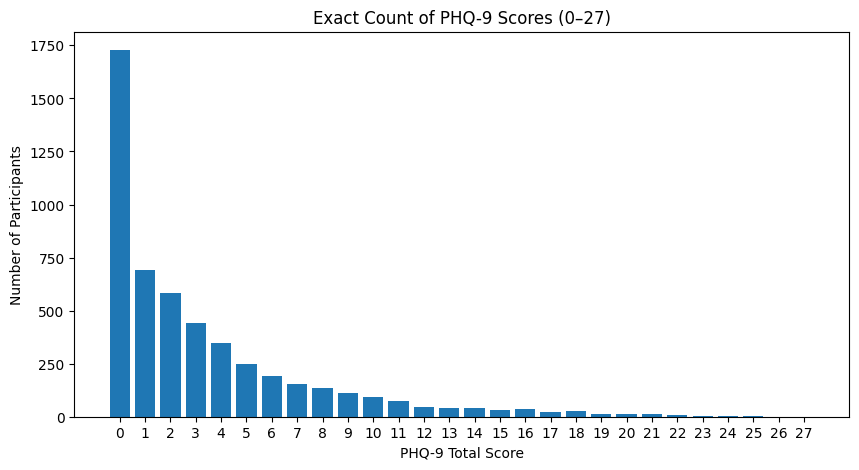

In [ ]:
score_counts = (
    df["phq9_total_score"]
    .value_counts()
    .reindex(range(0, 28), fill_value=0)
)

plt.figure(figsize=(10,5))
plt.bar(score_counts.index, score_counts.values)

plt.title("Exact Count of PHQ-9 Scores (0–27)")
plt.xlabel("PHQ-9 Total Score")
plt.ylabel("Number of Participants")

plt.xticks(range(0, 28))
plt.show()

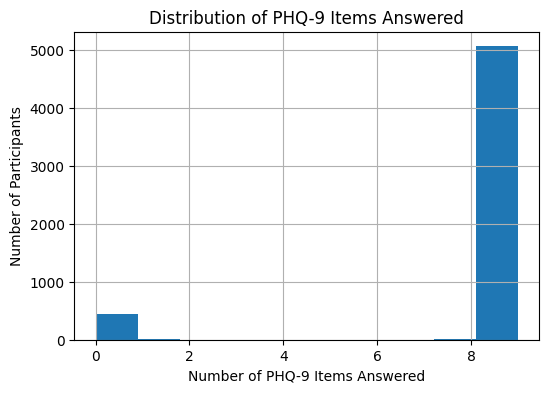

In [ ]:
plt.figure(figsize=(6,4))
df["phq9_items_answered"].hist(bins=10)
plt.title("Distribution of PHQ-9 Items Answered")
plt.xlabel("Number of PHQ-9 Items Answered")
plt.ylabel("Number of Participants")
plt.show()

**Comments:** From the analysis, it is clear that out of 5,533 participants in the dataset, 461 people scored above 10 in the PHQ-9 cutoff score, estimating a depression prevalence of 8.33% in the population. Moreover, 192 participants (3.47%) scored above 0 in PHQ-9 item 9, showing a smaller but significant population with more serious mental health issues. The histogram of the PHQ-9 total score indicates that most of the participants have low scores ranging from 0 to 5, indicating that most of the population has minimal to mild depressive symptoms. Moreover, the histogram shows that fewer people have high scores. The distribution of the data gradually decreases as the scores increase, which is expected in population-level mental health screening data. The graph showing PHQ-9 items answered indicates that most participants have answered all nine questions, showing that the data is complete with a small number of participants having missing data. In conclusion, these findings indicate that while depression is prevalent in a significant proportion of the population, most people have low levels of symptoms, and the data is reliable for further analysis of sociodemographic correlates of depression.

## Step 2 - Depression by Age

Create age groups and compute % depressed per group.

### 🎯 Objective

checking :

*   Are older people more depressed?
*   Are younger people less depressed?
*   How depression changes across age groups




In [ ]:
df["age_group"] = pd.cut(
    df["AgeYears_RIDAGEYR"],
    bins=[18, 30, 45, 60, 80],
    labels=["18-29", "30-44", "45-59", "60+"],
    include_lowest=True   # ✅ including 18 in the first bin
)

df[["AgeYears_RIDAGEYR", "age_group"]].head()


,AgeYears_RIDAGEYR,age_group
0,66.0,60+
1,18.0,18-29
2,66.0,60+
3,75.0,60+
4,56.0,45-59


In the above step, we have developed the age groups based on the continuous age variable (AgeYears_RIDAGEYR) for easier analysis and interpretation. The participants have been categorized into four age groups: 18-29, 30-44, 45-59, and 60+. We have used include_lowest=True to ensure that age 18 is included in the first group instead of being treated as missing data. From the output, we can see that the categorization is correct, for example, age 18 is now marked as 18-29, ages like 56 are categorized under 45-59, and ages like 66 or 75 are marked under the 60+ category. This step will help us in comparing the depression levels across different age groups instead of comparing across different ages.

In [ ]:
#Depression rate by age group
age_depression = df.groupby("age_group", observed=False)["probable_depression"].mean() * 100
age_depression

,probable_depression
age_group,
18-29,7.664884
30-44,8.478803
45-59,9.426848
60+,7.863974


This step illustrates how depression is spread among various age groups by finding the percentage of respondents who have probable depression in each category. From the results, it is clear that the age group with the highest rate of depression is 45-59 years, which is approximately 9.43%. The next age group is 30-44 years, which has a rate of depression of about 8.48%. The rate of depression in the 60+ age group is slightly lower, at approximately 7.86%, while the lowest rate is found in the 18-29 age group, which is about 7.66%. It can be concluded that depression is present in all age groups, but it is slightly more prevalent in middle-aged people, particularly those aged 45-59 years.

In [ ]:
#Count of depressed people per age group
df.groupby("age_group", observed=False)["probable_depression"].sum()

,probable_depression
age_group,
18-29,86
30-44,102
45-59,125
60+,148


This stage reveals the actual number of people who have probable depression in each age group. From the output, the age group with the highest number is 60+ with 148 participants, followed by the 45-59 age group with 125 participants, then the 30-44 age group with 102 participants, and finally the 18-29 age group with 86 participants. This indicates that although the percentage was slightly higher in the middle-aged group, the actual number of depressed people is highest in the 60+ age group. This might occur because there could be a higher number of participants in the 60+ age group. Therefore, this table allows us to comprehend the actual number of people affected in each age group, rather than just the percentage.

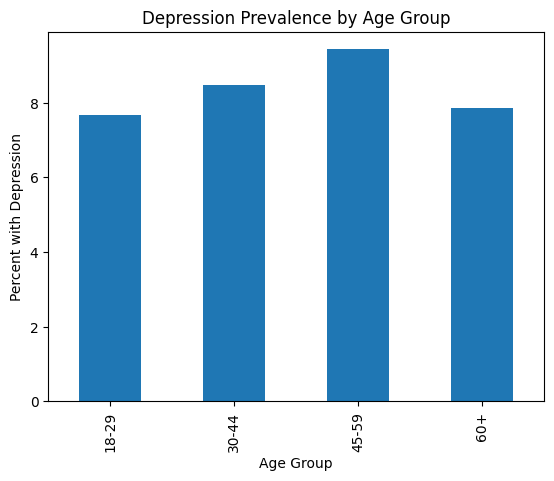

In [ ]:
import matplotlib.pyplot as plt

age_depression.plot(kind="bar")

plt.title("Depression Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percent with Depression")
plt.show()

This bar chart illustrates the distribution of depression among various age groups. Each bar on the chart indicates the percentage of people belonging to a particular age group who are identified as having probable depression. From this chart, it is clear that depression is found in all age groups, but it is slightly higher among middle-aged people. The 45-59 age group has the highest percentage of depression, which is approximately 9.4%, followed by the 30-44 age group, which has a percentage of about 8.5%. The 60+ age group has a slightly lower percentage of approximately 7.9%, and the 18-29 age group also has a similar percentage of about 7.7%.

3) Depression by Gender

### 🎯 Objective

Checking:

*   Do females have higher depression rates than males?

*   Do males have lower depression rates than females?

*   How depression prevalence changes between gender groups





              count  depressed  pct_depressed
Gender_Label                                 
Female         2861        278           9.72
Male           2672        183           6.85


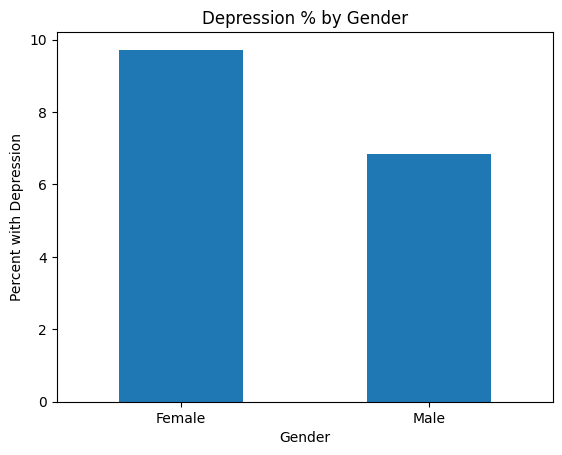

In [ ]:
df["Gender_Label"] = df["Sex_RIAGENDR"].map({1: "Male", 2: "Female"})
gender_tab = (df.groupby("Gender_Label")["probable_depression"]
             .agg(["count","sum"])
             .rename(columns={"sum":"depressed"}))
gender_tab["pct_depressed"] = (gender_tab["depressed"]/gender_tab["count"]*100).round(2)
print(gender_tab)

gender_tab["pct_depressed"].plot(kind="bar", title="Depression % by Gender")
plt.xlabel("Gender")
plt.ylabel("Percent with Depression")
plt.xticks(rotation=0)
plt.show()


**Comments:** This analysis will compare the prevalence of depression among females and males in the data set. Of 2,861 female respondents, 278 were identified as having probable depression, which is 9.72%. Of 2,672 male respondents, 183 were identified as depressed, which is 6.85%.
This indicates that depression is more prevalent among females than males in the data set. This is also evident in the bar graph, where the female bar is higher than the male bar. In other words, a higher proportion of females in the data set reported symptoms that meet the PHQ-9 criteria than males. This indicates that gender is a significant variable in relation to depression and should be taken into account in further analysis.

## Step 4 - Depression by Poverty-Income Ratio (PIR) (looks research-grade)

### 🎯 Objective

checking:

* Are people with lower income more likely to have depression?

* Are people with higher income less likely to have depression?

* How depression changes across economic groups

           count  depressed  pct_depressed
pir_group                                 
Low (≤1)     960        122          12.71
Mid (1–2)   1343        128           9.53
High (>2)   2496        143           5.73


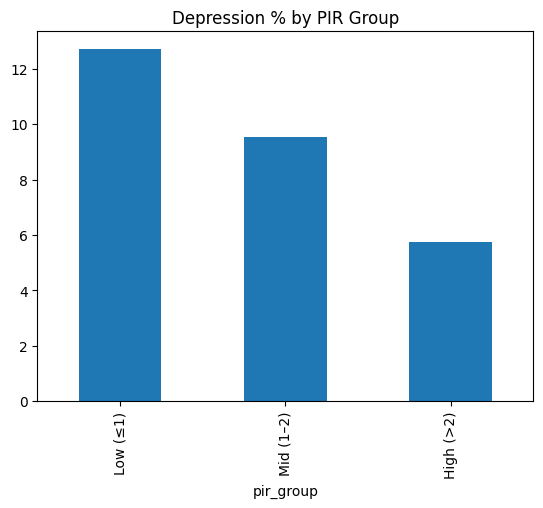

In [ ]:
pir = df["PovertyIncomeRatio_INDFMPIR"]
df["pir_group"] = pd.cut(pir, bins=[-0.01,1.0,2.0,5.0],
                         labels=["Low (≤1)","Mid (1–2)","High (>2)"])

pir_tab = (df.groupby("pir_group", observed = "false")["probable_depression"]
             .agg(["count","sum"])
             .rename(columns={"sum":"depressed"}))
pir_tab["pct_depressed"] = (pir_tab["depressed"]/pir_tab["count"]*100).round(2)
print(pir_tab)

pir_tab["pct_depressed"].plot(kind="bar", title="Depression % by PIR Group")
plt.show()


**Comments:**

Low (≤1) → Below or at poverty level

Mid (1–2) → Slightly above poverty / moderate income

High (>2) → Financially stable / higher income

This analysis looked into how depression differs from one income level to another using the Poverty-Income Ratio (PIR). The participants were classified into three groups: low income (≤1), middle income (1-2), and high income (>2). The findings clearly indicate a trend. The low income group recorded the highest level of depression at 12.71% (122 out of 960 respondents). The middle income group recorded a moderate level of depression at 9.53% (128 out of 1343 respondents). The high income group recorded the lowest level of depression at 5.73% (143 out of 2496 respondents). From the findings, it can be interpreted that depression is more prevalent among people with lower income levels and that it decreases as the income level increases.

## Step 5 — Depression by Education

,count,depressed,pct_depressed
Education_Label,,,
9–11th grade,598,66,11.04
College graduate Or above,1261,52,4.12
High school/GED,1251,113,9.03
Less than 9th grade,454,50,11.01
Some college/AA,1689,156,9.24


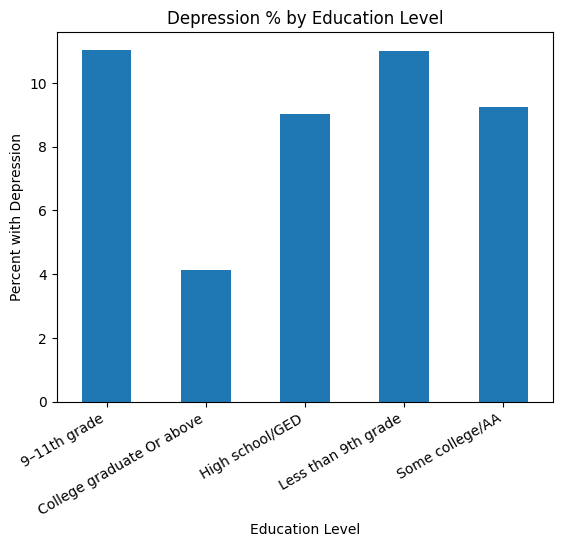

In [ ]:
# Map Education (DMDEDUC2) codes to labels (Adults 20+)
edu_map = {
    1: "Less than 9th grade",
    2: "9–11th grade",
    3: "High school/GED",
    4: "Some college/AA",
    5: "College graduate Or above"
}

df["Education_Label"] = df["EducationAdult_DMDEDUC2"].map(edu_map)

edu_tab = (df.groupby("Education_Label")["probable_depression"]
           .agg(["count","sum"])
           .rename(columns={"sum":"depressed"}))

edu_tab["pct_depressed"] = (edu_tab["depressed"] / edu_tab["count"] * 100).round(2)

display(edu_tab)

edu_tab["pct_depressed"].plot(kind="bar", title="Depression % by Education Level")
plt.ylabel("Percent with Depression")
plt.xlabel("Education Level")
plt.xticks(rotation=30, ha="right")
plt.show()

**Comments:** The prevalence of depression was not very different across racial and ethnic groups. The highest prevalence of probable depression was found in Non-Hispanic White people (9.91%), followed by Other Hispanic people (9.44%). The prevalence in Mexican American people was 8.11%, and it was slightly lower in Non-Hispanic Black people at 7.56%. The lowest prevalence of depression was found in people belonging to Other Race/Multi-racial groups (6.11%).
Despite the differences, the variation in prevalence across racial/ethnic groups is relatively moderate (about 6% to 10%). These results indicate that depression is prevalent in all racial and ethnic groups in this nationally representative sample, but it is slightly more prevalent in Non-Hispanic White and Other Hispanic groups. However, these are only descriptive results and do not control for possible confounding variables such as income, education, or age.

## Step 6 - Depression by Race/Ethnicity

,count,depressed,pct_depressed
Race_Label,,,
Mexican American,752,61,8.11
Non-Hispanic Black,1283,97,7.56
Non-Hispanic White,1898,188,9.91
Other Hispanic,519,49,9.44
Other Race/Multi-racial,1081,66,6.11


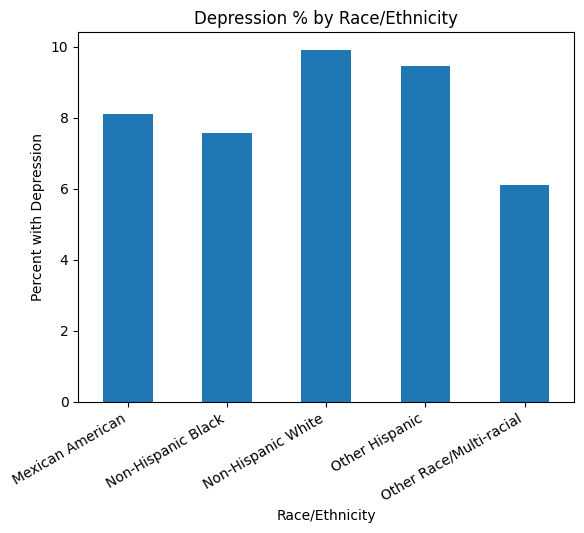

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Map Race/Ethnicity (RIDRETH1) codes to labels
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Race/Multi-racial"
}

df["Race_Label"] = df["RaceEthnicity1_RIDRETH1"].map(race_map)

# Summary table
race_tab = (df.groupby("Race_Label")["probable_depression"]
            .agg(["count","sum"])
            .rename(columns={"sum":"depressed"}))

race_tab["pct_depressed"] = (race_tab["depressed"] / race_tab["count"] * 100).round(2)

display(race_tab)

# Bar plot
race_tab["pct_depressed"].plot(kind="bar", title="Depression % by Race/Ethnicity")
plt.ylabel("Percent with Depression")
plt.xlabel("Race/Ethnicity")
plt.xticks(rotation=30, ha="right")
plt.show()

**Comments:** This analysis compares the likely depressed (PHQ-9 ≥ 10) by race/ethnicity groups in the combined NHANES data set (unweighted, descriptive). For each group, we calculated: (1) the number of participants in that group (count), (2) the number of participants in that group who are depressed (depressed), and (3) the percent depressed in that group (pct_depressed). In this data set, the prevalence of depression is highest in Non-Hispanic Whites (188/1898 = 9.91%) and Other Hispanics (49/519 = 9.44%). Mexican Americans have a prevalence of 8.11% (61/752), and Non-Hispanic Blacks have a prevalence of 7.56% (97/1283). The lowest prevalence is found in Other Race/Multi-Racial (66/1081 = 6.11%). Taken together, the prevalence of depression is somewhat variable between groups (about 6% to 10%), and this suggests that perhaps race/ethnicity is related to the prevalence of depression in this data set, but we should check this later using the proper survey weights.

## Step 7: Save Final Processed Dataset

To download Merged Dataset for further Analysis:



In [ ]:
df.to_csv("merged_final_dataset_eda_nb5.csv", index=False)

**Final Interpretation:** With final cleaning and variable selection complete, the combined NHANES dataset has 5,533 study subjects and 38 final variables addressing PHQ-9 scales and important sociodemographic predictors. Applying the common PHQ-9 cutoff of ≥ 10, 461 subjects (8.33%) were identified as having probable depression. Moreover, 192 subjects (3.47%) reported suicidal thoughts, as assessed by PHQ-9 item 9 (any non-zero response). The total PHQ-9 score is right-skewed, reflecting that most study subjects report few symptoms, while few report more severe symptoms.

Descriptive subgroup analyses reveal important trends. The prevalence of depression is slightly higher in the 45-59-year age group than in younger and older subjects. Females have a higher prevalence (9.72%) than males (6.85%). A strong socioeconomic gradient is evident, with depression highest in the low PIR group (≤1) and steadily decreasing with increasing income levels (12.71% → 9.53% → 5.73%). Across race/ethnicity categories, the prevalence is modestly variable (≈6-10%), with the highest in Non-Hispanic White and Other Hispanic subgroups.

The dataset is now ready for the next stage of analysis, including survey-weighted modeling and manuscript-ready analysis.